<a href="https://colab.research.google.com/github/skhazaei/TensorFlow-repo/blob/master/horses_or_human_no_Validation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Building a Horse or Human classifier with a convolutional neural network



Download the zip file containing humans or horses data for training 

In [ ]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip \
    -O /tmp/horse-or-human.zip

--2021-02-09 01:05:11--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.73.208, 172.217.7.176, 172.217.7.208, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.73.208|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘/tmp/horse-or-human.zip’

/tmp/horse-or-human 100%[===================>] 142.65M  53.1MB/s    in 2.7s    

2021-02-09 01:05:14 (53.1 MB/s) - ‘/tmp/horse-or-human.zip’ saved [149574867/149574867]



Once the data is download, then unzip the data in the tmp directory

In [ ]:
import zipfile

local_zip='/tmp/horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/horse-or-human')
zip_ref.close()

In [ ]:
ls

horses/  humans/


Point to the train human and horse directory


In [ ]:
import os

train_dir = os.path.join('/tmp/horse-or-human')
train_human_dir = os.path.join('/tmp/horse-or-human/humans')
train_horse_dir = os.path.join('/tmp/horse-or-human/horses')

Lets take a look at filenames at each directory:

In [ ]:
train_horse_names = os.listdir(train_horse_dir)
print (train_horse_names[:10])

['horse43-6.png', 'horse50-7.png', 'horse02-7.png', 'horse29-7.png', 'horse46-0.png', 'horse05-0.png', 'horse49-8.png', 'horse10-6.png', 'horse50-4.png', 'horse14-5.png']


In [ ]:
train_human_names = os.listdir(train_human_dir)
print (train_human_names[:10])

['human03-06.png', 'human03-26.png', 'human09-22.png', 'human15-27.png', 'human14-12.png', 'human12-00.png', 'human11-19.png', 'human04-04.png', 'human03-03.png', 'human14-00.png']


Print the number of training images we are working with per each 


In [ ]:
print ('total number of horses in training set: ', len(train_horse_names))
print ('total number of humans in training set: ', len(train_human_names))

total number of horses in training set:  500
total number of humans in training set:  527


Lets take a look at some of images to see how they look like:

In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

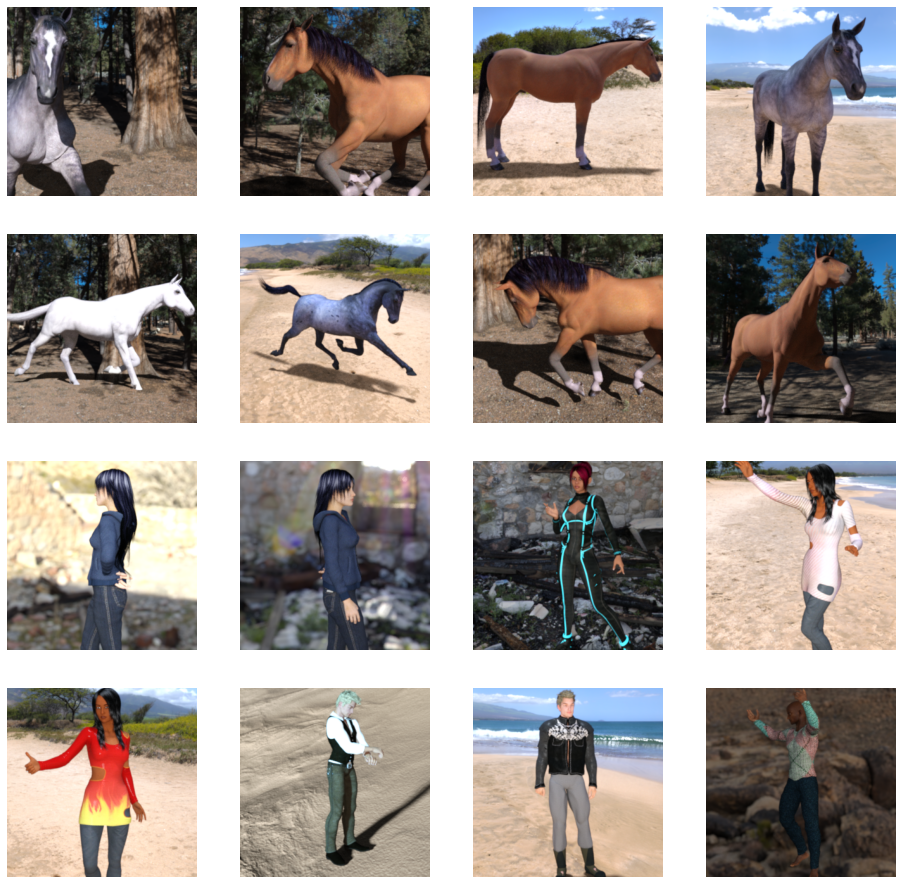

In [ ]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_horse_pix = [os.path.join(train_horse_dir, fname) 
                for fname in train_horse_names[pic_index-8:pic_index]]
next_human_pix = [os.path.join(train_human_dir, fname) 
                for fname in train_human_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_horse_pix+next_human_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

#Define convolutional model

In [ ]:
import tensorflow as tf
from tensorflow import keras
model = tf.keras.models.Sequential([
    # The input shape of the desired size of the image is 300x300 with 3 bytes color
    # The first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fifth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('horses') and 1 for the other ('humans')
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 298, 298, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 149, 149, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 147, 147, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 71, 71, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 35, 35, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 33, 33, 64)        3

# Compile the network:

In [ ]:
model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=0.001),
              metrics=['acc'], loss='binary_crossentropy')

# Data Preprocessing

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# all images will be rescaled by 1/255
train_datagen= ImageDataGenerator(rescale=1.0/255.0)

train_generator = train_datagen.flow_from_directory(
    # point to the source directory of training images
    train_dir,
    target_size=(300,300),
    batch_size=128,
    class_mode='binary'
)

Found 1027 images belonging to 2 classes.


# Training the model

In [ ]:
history = model.fit_generator(
    train_generator,
    validation_data=None,
    steps_per_epoch=8,
    epochs=15,
    verbose=2
)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/15
8/8 - 13s - loss: 0.8836 - acc: 0.5128
Epoch 2/15
8/8 - 6s - loss: 0.7744 - acc: 0.5617
Epoch 3/15
8/8 - 6s - loss: 1.0330 - acc: 0.6496
Epoch 4/15
8/8 - 6s - loss: 0.5456 - acc: 0.7620
Epoch 5/15
8/8 - 6s - loss: 0.5864 - acc: 0.8142
Epoch 6/15
8/8 - 6s - loss: 0.3890 - acc: 0.8231
Epoch 7/15
8/8 - 6s - loss: 0.2807 - acc: 0.8854
Epoch 8/15
8/8 - 6s - loss: 0.2564 - acc: 0.8975
Epoch 9/15
8/8 - 6s - loss: 0.1035 - acc: 0.9566
Epoch 10/15
8/8 - 6s - loss: 3.2281 - acc: 0.8443
Epoch 11/15
8/8 - 6s - loss: 0.1706 - acc: 0.9805
Epoch 12/15
8/8 - 6s - loss: 0.0692 - acc: 0.9844
Epoch 13/15
8/8 - 6s - loss: 0.0694 - acc: 0.9778
Epoch 14/15
8/8 - 6s - loss: 0.2556 - acc: 0.9232
Epoch 15/15
8/8 - 6s - loss: 0.0514 - acc: 0.9833


#Test the model 

Let's see how well the model prediction is. We use some random images of horses and humans  downloaded from internet.


 

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(300, 300))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
  if classes[0]>0.5:
    print(fn + " is a human")
  else:
    print(fn + " is a horse")

Saving beauty-1462986_640.jpg to beauty-1462986_640.jpg
Saving worried-girl-413690_640.jpg to worried-girl-413690_640.jpg
Saving horse-5836459_640.jpg to horse-5836459_640.jpg
Saving horse-2196755_640.jpg to horse-2196755_640.jpg
Saving horses-1414889_640.jpg to horses-1414889_640.jpg
Saving horses-1984977_640.jpg to horses-1984977_640.jpg
[1.]
beauty-1462986_640.jpg is a human
[0.]
worried-girl-413690_640.jpg is a horse
[1.]
horse-5836459_640.jpg is a human
[0.]
horse-2196755_640.jpg is a horse
[0.]
horses-1414889_640.jpg is a horse
[1.]
horses-1984977_640.jpg is a human


# Visualizing Intermediate Representations

Let's pick a random image from the training set, and then generate a figure where each row is the output of a layer, and each image in the row is a specific filter in that output feature map. Rerun this cell to generate intermediate representations for a variety of training images.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in true_divide


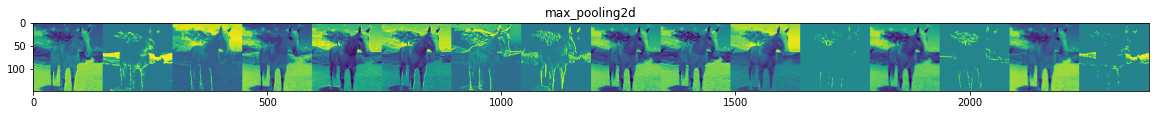

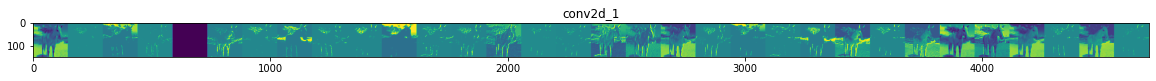

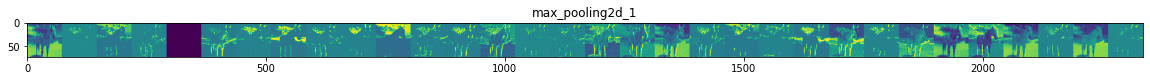

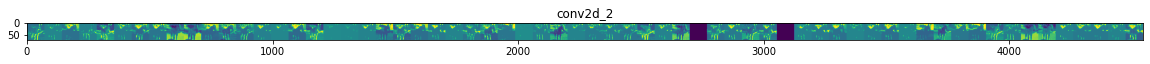

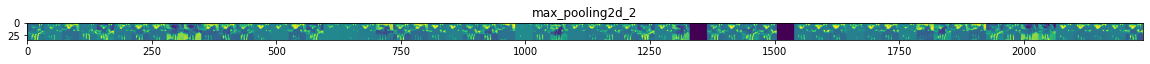

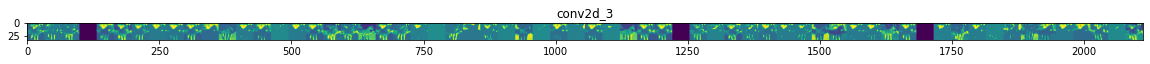

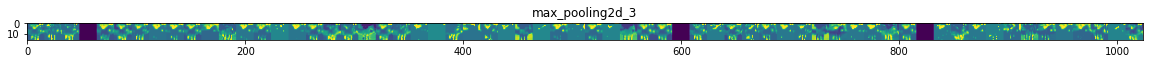

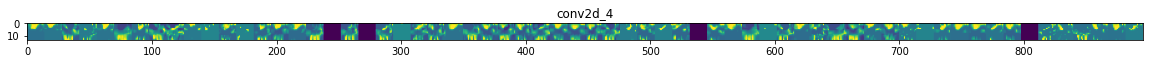

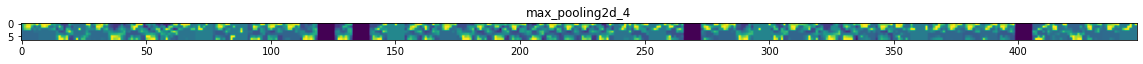

In [ ]:
import numpy as np
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img

# Let's define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in model.layers[1:]]
#visualization_model = Model(img_input, successive_outputs)
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)
# Let's prepare a random input image from the training set.
horse_img_files = [os.path.join(train_horse_dir, f) for f in train_horse_names]
human_img_files = [os.path.join(train_human_dir, f) for f in train_human_names]
img_path = random.choice(horse_img_files + human_img_files)

img = load_img(img_path, target_size=(300, 300))  # this is a PIL image
x = img_to_array(img)  # Numpy array with shape (150, 150, 3)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 150, 150, 3)

# Rescale by 1/255
x /= 255

# Let's run our image through our network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers[1:]]

# Now let's display our representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  if len(feature_map.shape) == 4:
    # Just do this for the conv / maxpool layers, not the fully-connected layers
    n_features = feature_map.shape[-1]  # number of features in feature map
    # The feature map has shape (1, size, size, n_features)
    size = feature_map.shape[1]
    # We will tile our images in this matrix
    display_grid = np.zeros((size, size * n_features))
    for i in range(n_features):
      # Postprocess the feature to make it visually palatable
      x = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x, 0, 255).astype('uint8')
      # We'll tile each filter into this big horizontal grid
      display_grid[:, i * size : (i + 1) * size] = x
    # Display the grid
    scale = 20. / n_features
    plt.figure(figsize=(scale * n_features, scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')